In [1]:
import numpy as np
np.__version__

'1.15.2'

In [2]:
import pandas as pd
pd.__version__

'0.23.4'

In [3]:
import sklearn as sk
sk.__version__
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
mpl.__version__

'3.0.0'

In [5]:
import seaborn as sns
sns.__version__

'0.9.0'

In [6]:
import pydotplus
import graphviz
graphviz.__version__

'0.8.4'

In [7]:
import tensorflow as tf
tf.__version__

C:\Users\nashi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.11.0'

In [8]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [9]:
df_gus = pd.read_csv("measurements.csv")

In [10]:
df_gus[0:50]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [11]:
df_gus[51:100]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
51,"10,6","4,9",63,"21,5",6,NaN,SP98,0,0,0,NaN,NaN
52,"11,6","4,2",61,"21,5",7,NaN,SP98,0,0,0,NaN,NaN
53,"13,1","6,1",46,"21,5",6,rain,SP98,0,1,0,NaN,NaN
54,"6,1","6,4",28,"21,5",8,NaN,SP98,0,0,0,NaN,NaN
55,"153,5","4,9",82,"21,5",3,rain,SP98,0,1,0,NaN,NaN
56,"11,8","4,9",24,"21,5",7,NaN,SP98,0,0,0,NaN,NaN
57,"12,3","6,2",61,"21,5",8,NaN,SP98,0,0,0,NaN,NaN
58,"12,4","4,2",57,"21,5",8,NaN,SP98,0,0,0,NaN,NaN
59,"12,3","5,7",52,"21,5",8,rain,SP98,0,1,0,NaN,NaN
60,"2,9","7,9",18,"21,5",9,AC rain,SP98,1,1,0,NaN,NaN


In [12]:
#specialsとac,rainの矛盾を修正しようとしたが、どちらが正しいかわからないので中止
#df_gus.iloc[61,5] = "AC rain"
#print(df_gus.iloc[60,5])
#print(df_gus.iloc[61,5])

In [13]:
df_gus[100:150]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
100,"5,3","4,1",34,NaN,9,NaN,SP98,0,0,0,NaN,NaN
101,"26,2","5,8",71,21,8,AC rain,SP98,1,1,0,NaN,NaN
102,"18,8",5,62,NaN,9,rain,SP98,0,1,0,NaN,NaN
103,"4,9","6,9",25,21,12,rain,SP98,0,1,0,NaN,NaN
104,"12,4","5,4",18,21,11,AC rain,SP98,1,1,0,NaN,NaN
105,"22,9","5,3",45,"20,5",7,NaN,SP98,0,0,0,NaN,NaN
106,"162,7","5,5",75,23,1,NaN,SP98,0,0,0,45,SP98
107,"4,9","6,5",26,21,1,NaN,SP98,0,0,0,NaN,NaN
108,"11,8","4,7",36,21,4,NaN,SP98,0,0,0,NaN,NaN
109,"16,6","5,1",56,21,7,NaN,SP98,0,0,0,NaN,NaN


In [14]:
df_gus[150:200]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
150,"16,8",4,46,"21,5",8,NaN,E10,0,0,0,NaN,NaN
151,"9,9",5,28,"21,5",9,NaN,E10,0,0,0,NaN,NaN
152,"22,9","4,6",61,"21,5",7,rain,E10,0,1,0,NaN,NaN
153,"17,3",5,61,"21,5",6,AC rain,E10,1,1,0,NaN,NaN
154,"11,8","4,3",37,"21,5",7,NaN,E10,0,0,0,NaN,NaN
155,"36,6","5,2",80,"21,5",7,rain,E10,0,1,0,NaN,NaN
156,"44,9","4,7",62,"21,5",8,NaN,E10,0,0,0,NaN,NaN
157,"11,8","4,2",34,"21,5",9,rain,E10,0,1,0,NaN,NaN
158,"21,6","5,3",44,"21,5",9,rain,E10,0,1,0,NaN,NaN
159,"39,4","5,3",60,"21,5",9,rain,E10,0,1,0,NaN,NaN


In [15]:
df_gus[200:250]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
200,"19,6","4,9",43,"21,5",13,NaN,SP98,0,0,0,NaN,NaN
201,"22,2","3,8",42,NaN,15,NaN,SP98,0,0,0,NaN,NaN
202,"13,6","4,5",44,19,18,NaN,SP98,0,0,0,NaN,NaN
203,"12,6","4,1",33,NaN,17,NaN,SP98,0,0,0,NaN,NaN
204,"8,7","5,3",28,"22,5",12,AC rain,SP98,1,1,0,NaN,NaN
205,"7,9","4,7",31,"22,5",12,AC,SP98,1,0,0,NaN,NaN
206,"2,4",9,26,20,10,NaN,SP98,0,0,0,NaN,NaN
207,"4,9","6,3",26,20,10,NaN,SP98,0,0,0,NaN,NaN
208,"18,1","3,6",36,20,19,NaN,SP98,0,0,0,NaN,NaN
209,"25,9","3,7",39,20,21,NaN,SP98,0,0,0,NaN,NaN


In [16]:
df_gus[250:300]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
250,"31,5","4,1",30,"22,5",16,sun,E10,0,0,1,NaN,NaN
251,"11,8","4,4",42,"22,5",8,NaN,E10,0,0,0,NaN,NaN
252,"24,9","4,5",53,"22,5",14,NaN,E10,0,0,0,NaN,NaN
253,17,"3,9",46,"22,5",14,sun,E10,0,0,1,NaN,NaN
254,2,"8,1",20,"22,5",14,NaN,E10,0,0,0,NaN,NaN
255,"11,8","4,4",33,"22,5",8,NaN,E10,0,0,0,NaN,NaN
256,"7,4",5,31,"22,5",12,NaN,E10,0,0,0,NaN,NaN
257,"12,4","4,7",55,"22,5",14,sun,E10,0,0,1,NaN,NaN
258,2,6,22,"22,5",14,NaN,E10,0,0,0,NaN,NaN
259,14,5,41,"22,5",8,NaN,E10,0,0,0,NaN,NaN


In [17]:
df_gus[300:350]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
300,"36,5","3,9",54,23,18,sun,SP98,0,0,1,NaN,NaN
301,19,5,35,22,15,sun ac,SP98,1,0,1,NaN,NaN
302,"16,6","4,4",46,22,5,ac,SP98,1,0,0,NaN,NaN
303,"29,9","4,5",32,22,18,ac,SP98,1,0,0,NaN,NaN
304,16,"3,8",42,22,11,NaN,SP98,0,0,0,NaN,NaN
305,"21,1","5,1",33,22,10,rain,SP98,0,1,0,NaN,NaN
306,16,"3,9",40,22,10,NaN,SP98,0,0,0,NaN,NaN
307,"11,9","5,3",34,22,13,NaN,SP98,0,0,0,NaN,NaN
308,"10,1","4,2",35,22,16,NaN,SP98,0,0,0,NaN,NaN
309,"31,9","4,3",33,22,16,NaN,SP98,0,0,0,NaN,NaN


In [18]:
#specialsとacの矛盾を修正しようとしたが、どちらが正しいかわからないので中止
#df_gus.iloc[334,7] = 1
#print(df_gus.iloc[334,7])
#print(df_gus.iloc[331,7])

In [19]:
df_gus[300:350]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
300,"36,5","3,9",54,23,18,sun,SP98,0,0,1,NaN,NaN
301,19,5,35,22,15,sun ac,SP98,1,0,1,NaN,NaN
302,"16,6","4,4",46,22,5,ac,SP98,1,0,0,NaN,NaN
303,"29,9","4,5",32,22,18,ac,SP98,1,0,0,NaN,NaN
304,16,"3,8",42,22,11,NaN,SP98,0,0,0,NaN,NaN
305,"21,1","5,1",33,22,10,rain,SP98,0,1,0,NaN,NaN
306,16,"3,9",40,22,10,NaN,SP98,0,0,0,NaN,NaN
307,"11,9","5,3",34,22,13,NaN,SP98,0,0,0,NaN,NaN
308,"10,1","4,2",35,22,16,NaN,SP98,0,0,0,NaN,NaN
309,"31,9","4,3",33,22,16,NaN,SP98,0,0,0,NaN,NaN


In [20]:
df_gus[300:350]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
300,"36,5","3,9",54,23,18,sun,SP98,0,0,1,NaN,NaN
301,19,5,35,22,15,sun ac,SP98,1,0,1,NaN,NaN
302,"16,6","4,4",46,22,5,ac,SP98,1,0,0,NaN,NaN
303,"29,9","4,5",32,22,18,ac,SP98,1,0,0,NaN,NaN
304,16,"3,8",42,22,11,NaN,SP98,0,0,0,NaN,NaN
305,"21,1","5,1",33,22,10,rain,SP98,0,1,0,NaN,NaN
306,16,"3,9",40,22,10,NaN,SP98,0,0,0,NaN,NaN
307,"11,9","5,3",34,22,13,NaN,SP98,0,0,0,NaN,NaN
308,"10,1","4,2",35,22,16,NaN,SP98,0,0,0,NaN,NaN
309,"31,9","4,3",33,22,16,NaN,SP98,0,0,0,NaN,NaN


In [21]:
df_gus[350:400]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
350,"16,1","4,8",36,22,18,rain,SP98,0,1,0,NaN,NaN
351,16,"4,1",46,22,17,NaN,SP98,0,0,0,NaN,NaN
352,"16,3",4,35,22,23,NaN,SP98,0,0,0,NaN,NaN
353,16,"3,7",44,22,16,NaN,SP98,0,0,0,NaN,NaN
354,"18,3","4,3",46,22,23,NaN,SP98,0,0,0,NaN,NaN
355,"4,5","5,2",23,22,23,sun,SP98,0,0,1,NaN,NaN
356,17,"4,2",48,22,16,NaN,SP98,0,0,0,NaN,NaN
357,"6,1",5,35,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
358,"6,1",5,33,22,24,sun,SP98,0,0,1,NaN,NaN
359,"17,3","4,2",36,22,22,NaN,SP98,0,0,0,NaN,NaN


In [22]:
#欠損値確認
df_gus.isnull()
df_gus.isnull().sum()
df_gus.notnull().sum()

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

データの確認結果<br>
・refill litersはほとんど欠損値で、また給油量だと思われるため除外する<br>
・refill gasは給油した場合の油種と思われ、gastypeと同じため除外する<br>
・specialsは欠損値が多い。AC,rain,sunはspecialsを分解したもの

In [23]:
df_gus.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [24]:
#データの修正（,を.に変換して　float型に）
df_gus["distance"] = df_gus["distance"].str.replace(',','.')
df_gus["distance"] = df_gus["distance"].astype(float)
df_gus["consume"] = df_gus["consume"].str.replace(',','.')
df_gus["consume"] = df_gus["consume"].astype(float)
df_gus["temp_inside"] = df_gus["temp_inside"].str.replace(',','.')
df_gus["temp_inside"] = df_gus["temp_inside"].astype(float)

In [25]:
#gastype置き換え
df_gus["gas_type"] = df_gus["gas_type"].str.replace('SP98','0')
df_gus["gas_type"] = df_gus["gas_type"].str.replace('E10','1')
df_gus["gas_type"] = df_gus["gas_type"].astype(int)

In [26]:
df_gus.temp_inside.value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

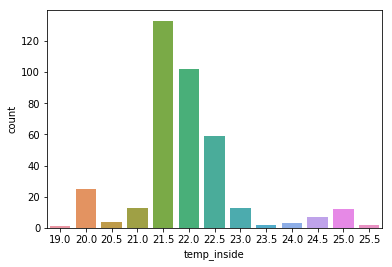

In [27]:
sns.countplot(x="temp_inside",data=df_gus)

In [28]:
df_gus.temp_inside.mean()

21.929521276595743

In [29]:
df_gus.temp_inside.median()

22.0

In [30]:
#temp_insideの欠損値を平均値で埋める
df_gus.temp_inside = df_gus.temp_inside.fillna(df_gus.temp_inside.mean())

In [31]:
#ほとんど欠損のため削除
df_gus = df_gus.drop("refill liters", axis=1)
df_gus = df_gus.drop("refill gas", axis=1)

In [32]:
df_gus.isnull().sum()

distance          0
consume           0
speed             0
temp_inside       0
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

specialsの欠損値の多さが悩ましい。AC,rain,sunは欠損値がないが、0なのか、欠損値なのかは判別がつかない。<br>
暑かったり、雨降ったりしたときはエアコンを使用するなど、それぞれの相関から欠損を推定することもできそう。

In [33]:
#とりあえず欠損値がある行を削除して検証
df_gus = df_gus.dropna(how='any')

In [34]:
df_gus.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
specials        0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [35]:
df_gus.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
specials         object
gas_type          int32
AC                int64
rain              int64
sun               int64
dtype: object

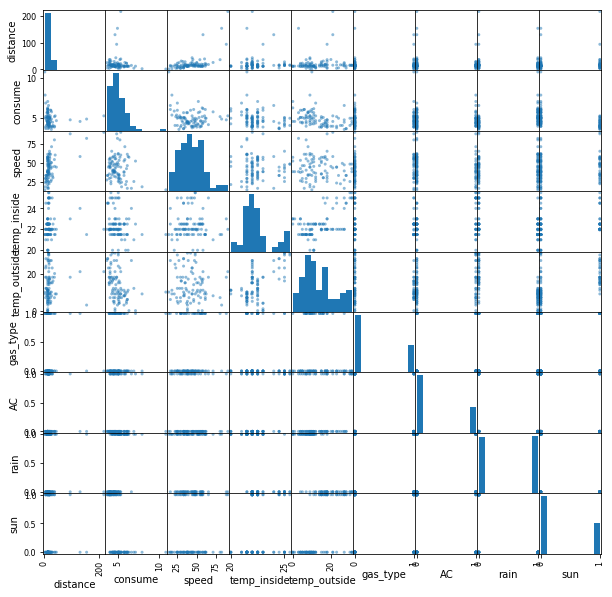

In [36]:
# 散布図行列
pd.plotting.scatter_matrix(df_gus, figsize=(10,10))
plt.show()

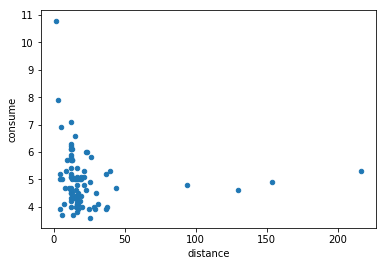

In [37]:
df_gus.plot(kind='scatter', x='distance', y='consume')

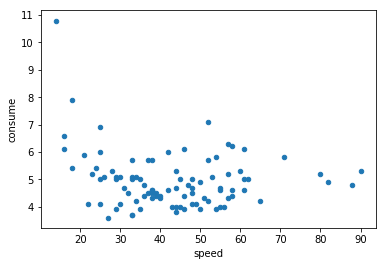

In [38]:
df_gus.plot(kind='scatter', x='speed', y='consume')

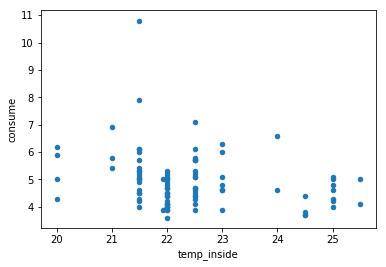

In [39]:
df_gus.plot(kind='scatter', x='temp_inside', y='consume')

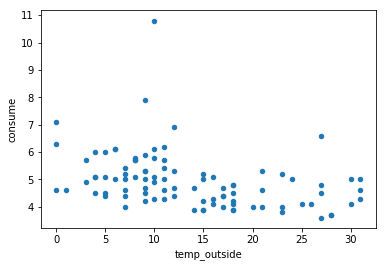

In [40]:
df_gus.plot(kind='scatter', x='temp_outside', y='consume')

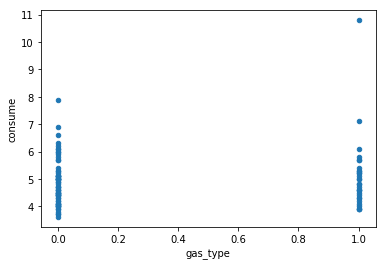

In [41]:
df_gus.plot(kind='scatter', x='gas_type', y='consume')

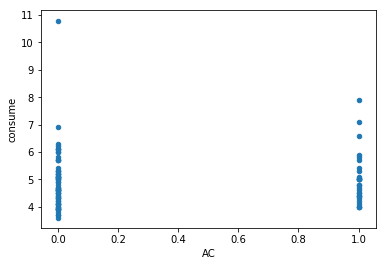

In [42]:
df_gus.plot(kind='scatter', x='AC', y='consume')

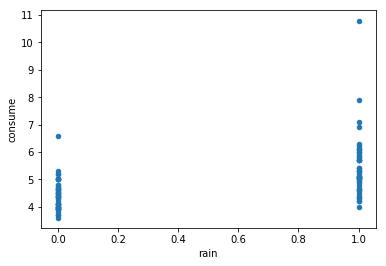

In [43]:
df_gus.plot(kind='scatter', x='rain', y='consume')

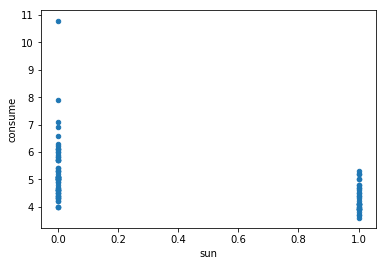

In [44]:
df_gus.plot(kind='scatter', x='sun', y='consume')

In [45]:
# 相関係数を確認
df_gus.corr()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
distance,1.000000,-0.079904,0.558184,0.020264,0.066470,0.013073,-0.087775,-0.110055,0.092833
consume,-0.079904,1.000000,-0.189097,-0.245473,-0.368477,0.086248,0.044829,0.500290,-0.444397
speed,0.558184,-0.189097,1.000000,-0.022366,-0.091254,0.135647,-0.090308,-0.017268,0.124890
temp_inside,0.020264,-0.245473,-0.022366,1.000000,0.563069,-0.039602,0.326787,-0.461589,0.194212
temp_outside,0.066470,-0.368477,-0.091254,0.563069,1.000000,-0.183530,0.163158,-0.721194,0.516586
gas_type,0.013073,0.086248,0.135647,-0.039602,-0.183530,1.000000,-0.116930,0.038587,0.081218
AC,-0.087775,0.044829,-0.090308,0.326787,0.163158,-0.116930,1.000000,-0.169731,-0.243250
rain,-0.110055,0.500290,-0.017268,-0.461589,-0.721194,0.038587,-0.169731,1.000000,-0.732116
sun,0.092833,-0.444397,0.124890,0.194212,0.516586,0.081218,-0.243250,-0.732116,1.000000


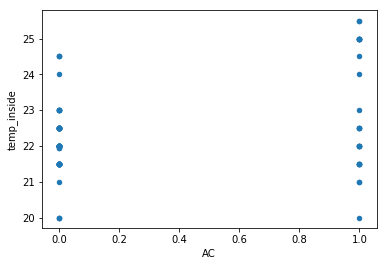

In [46]:
df_gus.plot(kind='scatter', x='AC', y='temp_inside')

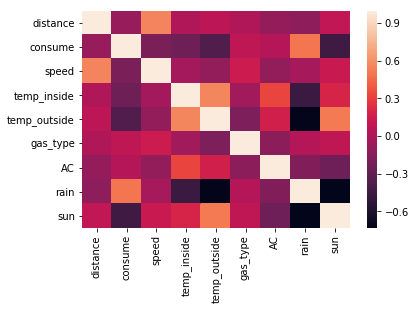

In [47]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_gus.corr())
plt.show()

説明変数の選択<br>
・speedは他の変数と相関があまりなく、consumeとある程度相関があるため選択<br>
・tempinside,outsideのうち、相関の高いoutsideを選択<br>
・rain,sunのうち、相関の高いrainを選択<br>


In [48]:
# 係数を求める
y = df_gus["consume"].values
#X = df_gus[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values
X = df_gus[['speed', 'temp_outside','rain', ]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
#w4 = regr.coef_[3]
#w5 = regr.coef_[4]
#w6 = regr.coef_[5]
#w7 = regr.coef_[6]
#w8 = regr.coef_[7]

In [49]:
#x1 = df_gus['distance'].values
x1 = df_gus['speed'].values
#x2 = df_gus['temp_inside'].values
x2 = df_gus['temp_outside'].values
#x5 = df_gus['gas_type'].values
#x6 = df_gus['AC'].values
x3 = df_gus['rain'].values
#x5 = df_gus['sun'].values

# 重みと二乗誤差の確認
#y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7 + w8 * x8 
y_est = w0 + w1 * x1 + w2 * x2 + w3* x3

squared_error = 0.5 * np.sum((y - y_est) ** 2)
#print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}, w8 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, w7, w8))
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f},w3 = {:.3f} '.format(w0, w1, w2, w3))

print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 5.101, w1 = -0.012, w2 = -0.007,w3 = 0.929 
二乗誤差 = 34.470


In [50]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.741
MAE = 0.592
RMSE = 0.861
